In [ ]:
!pip install wordcloud

In [1]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

## 데이터 불러오기

In [34]:
# 학습, 테스트 데이터
train = pd.read_csv('ELL/train.csv')
test = pd.read_csv('ELL/test.csv')

In [35]:
train.head(3)

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5


## EDA
* 데이터셋 확인
* 결측치 확인
* 데이터 및 full_text 컬럼 시각화

### 데이터 확인

In [36]:
# 데이터 정보 확인
train.info()
print("\n학습 데이터 갯수: ", train.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3911 entries, 0 to 3910
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   text_id      3911 non-null   object 
 1   full_text    3911 non-null   object 
 2   cohesion     3911 non-null   float64
 3   syntax       3911 non-null   float64
 4   vocabulary   3911 non-null   float64
 5   phraseology  3911 non-null   float64
 6   grammar      3911 non-null   float64
 7   conventions  3911 non-null   float64
dtypes: float64(6), object(2)
memory usage: 244.6+ KB

학습 데이터 갯수:  (3911, 8)


In [37]:
# 데이터 통계 정보 확인
train.describe()

,cohesion,syntax,vocabulary,phraseology,grammar,conventions
count,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000
mean,3.127077,3.028254,3.235745,3.116850,3.032856,3.081053
std,0.662542,0.644399,0.583148,0.655997,0.699841,0.671450
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.500000,2.500000,3.000000,2.500000,2.500000,2.500000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [38]:
# 결측치 확인
train.isnull().sum()

text_id        0
full_text      0
cohesion       0
syntax         0
vocabulary     0
phraseology    0
grammar        0
conventions    0
dtype: int64

In [39]:
test.isnull().sum()

text_id      0
full_text    0
dtype: int64

In [40]:
# 샘플링 데이터 확인 테이블 생성 함수
def get_texts_table(df):
    # 각 행을 새로운 DataFrame 형식으로 정리
    data = []
    
    for idx, row in df.iterrows():
        data.append({
            "Text ID": row.text_id,
            "Cohesion": row.cohesion,
            "Syntax": row.syntax,
            "Vocabulary": row.vocabulary,
            "Phraseology": row.phraseology,
            "Grammar": row.grammar,
            "Conventions": row.conventions,
            "Text (truncated)": row.full_text[:400]  # 400개만 추출
        })

    # DataFrame 생성
    table_df = pd.DataFrame(data)
    return table_df

In [41]:
# 데이터 랜덤 샘플링
texts = train.sample(frac=1, random_state=420).head(3)

display(get_texts_table(texts))

,Text ID,Cohesion,Syntax,Vocabulary,Phraseology,Grammar,Conventions,Text (truncated)
0,67F6FEDD7677,2.5,2.5,2.5,2.0,3.0,2.0,Some schools have programs for youngers and ol...
1,C537E278BAE6,2.5,2.5,3.0,2.5,2.5,3.0,No they shouldn't add an hour more because we ...
2,F7CBE1D11BF8,3.5,3.5,3.0,3.0,4.0,4.0,Is true self-esteem caused by self-confidence ...


In [43]:
# 평가 요소 컬럼 추출
LABEL_COLUMNS = ['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']

In [44]:
# 데이터 랜덤 샘플링 - 최고점
train['total_score'] = train[LABEL_COLUMNS].sum(axis=1)
highest_df = train.sort_values('total_score', ascending=False).head(4)

display(get_texts_table(highest_df))

,Text ID,Cohesion,Syntax,Vocabulary,Phraseology,Grammar,Conventions,Text (truncated)
0,B1AFACE6704E,5.0,5.0,5.0,5.0,5.0,5.0,I agree with Michelangelo's statement as I hav...
1,12E3D52345C6,5.0,5.0,5.0,5.0,4.5,5.0,Technology has always acted as a compelling an...
2,52DC3B7C3952,5.0,5.0,4.5,5.0,5.0,5.0,Working From Home\n\nShould students be allowe...
3,EC2758A5B74E,5.0,5.0,4.5,5.0,5.0,4.5,"Dear School board,\n\nWhy does a student's edu..."


In [45]:
# 데이터 랜덤 샘플링 - 최저점
train['total_score'] = train[LABEL_COLUMNS].sum(axis=1)
lowest_df = train.sort_values('total_score').head(4)

display(get_texts_table(lowest_df))

,Text ID,Cohesion,Syntax,Vocabulary,Phraseology,Grammar,Conventions,Text (truncated)
0,48EA282A4EAF,1.0,1.0,1.0,1.0,1.0,1.0,some student offer distance learning as an opt...
1,767533E12569,1.0,1.0,1.0,1.0,1.0,1.0,he is a good because they are the prescient an...
2,DB2EA5C4828F,1.0,1.0,1.5,1.0,1.0,1.0,"Technology is positive, because is the good po..."
3,F69C85F4C3CA,1.0,1.0,1.5,1.0,1.0,1.5,the memorable teacher ever had\r\n\r\nwas a te...


### 데이터 시각화

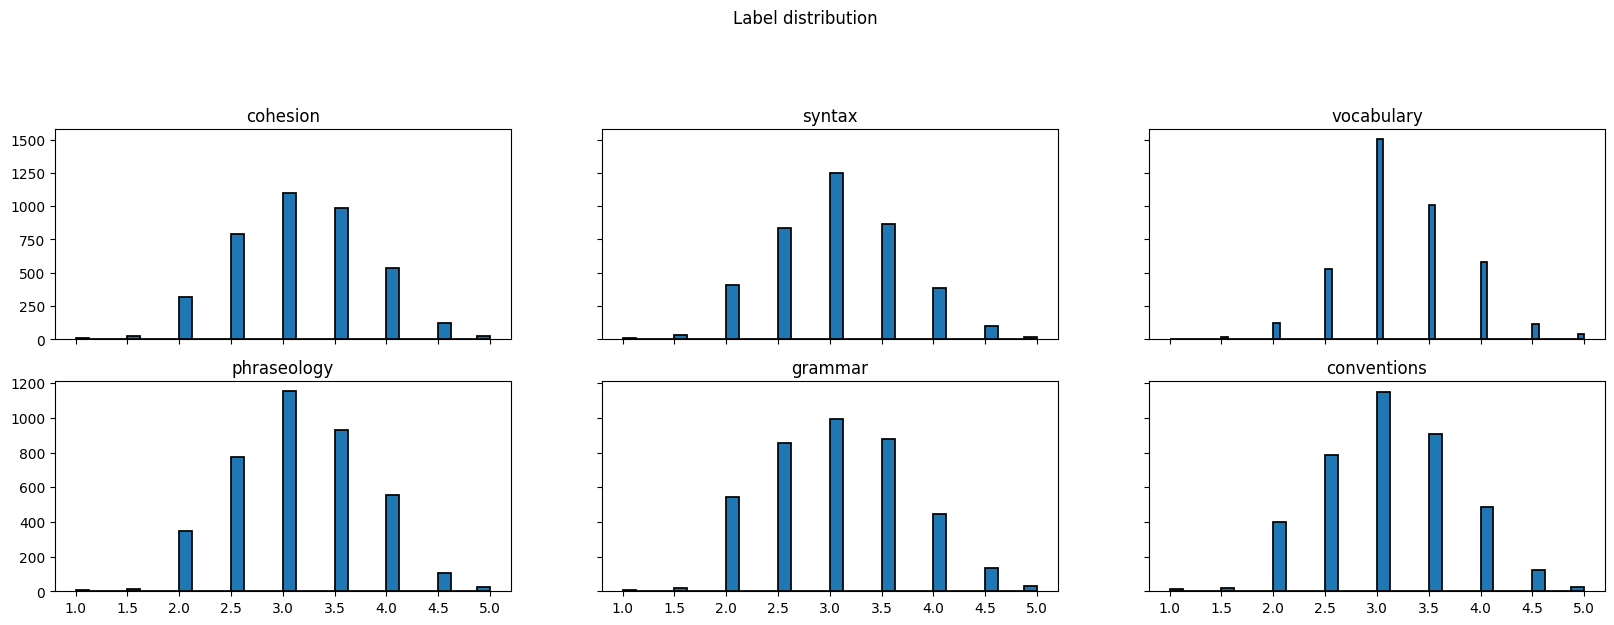

In [46]:
# 분석 지표 시각화
fig, axes = plt.subplots(2, len(LABEL_COLUMNS) // 2, sharex='col', sharey='row', figsize=(20, 6))

for i, label_col in enumerate(LABEL_COLUMNS):
    ax = axes.flat[i]
    sns.histplot(x=label_col, data=train, linewidth=1.25, alpha=1, ax=ax, zorder=2)
    ax.set_title(label_col)
    ax.set(xlabel=None, ylabel=None)
    
fig.suptitle('Label distribution', y=1.08)
plt.show()

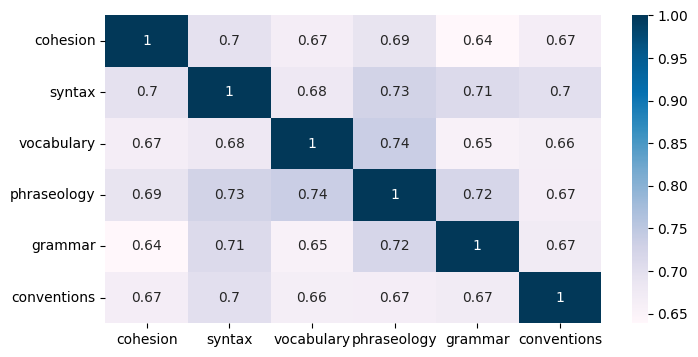

In [47]:
# 상관관계 시각화
plt.figure(figsize=(8, 4))
sns.heatmap(train[LABEL_COLUMNS].corr(), annot=True, cbar=True, cmap='PuBu')
plt.show()

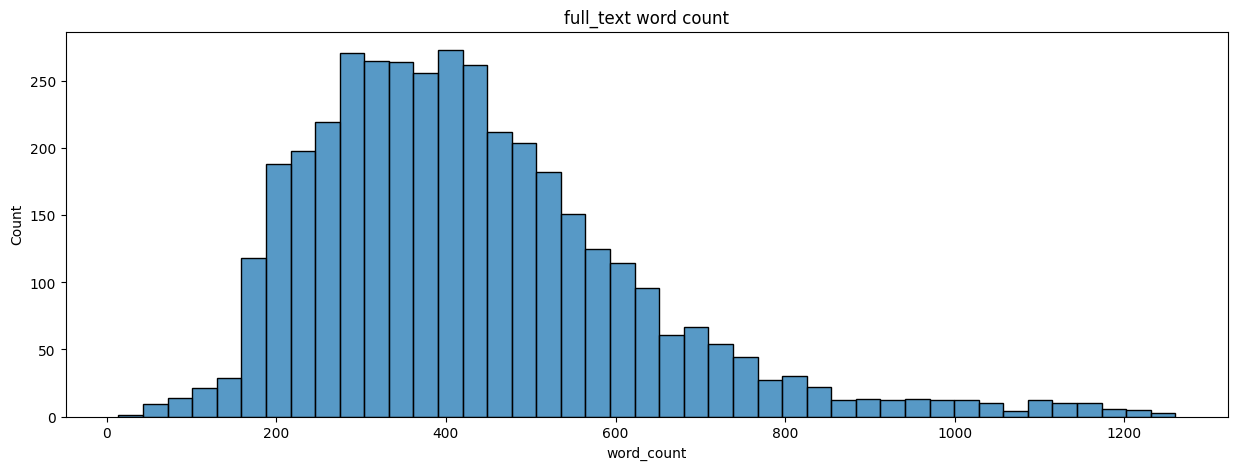

In [48]:
# full_text 단어 수 시각화
fig = plt.figure(figsize=(15, 5))
train['word_count'] = train.full_text.apply(lambda x: len(x.split()))
sns.histplot(data=train, x="word_count")
plt.title("full_text word count")
plt.show()

In [49]:
train['word_count'].describe()

count    3911.000000
mean      430.492969
std       191.868449
min        14.000000
25%       294.000000
50%       402.000000
75%       526.500000
max      1260.000000
Name: word_count, dtype: float64

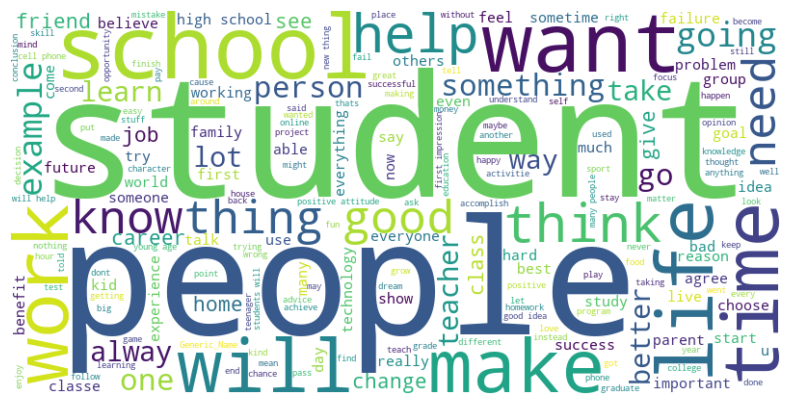

In [50]:
# full_text 워드클라우드 시각화
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(' '.join(train.full_text))
plt.figure(figsize=(20, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

필사 Notebook
----
[[Efficiency 3rd place] deberta_v3_xsmall](https://www.kaggle.com/code/dsohonosom/efficiency-3rd-place-deberta-v3-xsmall/notebook)

## 경로 및 초기 설정

In [ ]:
!pip uninstall -y transformers && pip install transformers

In [11]:
# 필요한 라이브러리 불러오기
import os
import shutil
from pathlib import Path
from tqdm.auto import tqdm

import gc
import random
import warnings
warnings.filterwarnings("ignore")

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset

import transformers
from transformers import AutoModel, AutoConfig
%env TOKENIZERS_PARALLELISM=true

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

from text_unidecode import unidecode
from typing import Dict, List, Tuple
import codecs

env: TOKENIZERS_PARALLELISM=true


In [12]:
# 디렉토리 설정
INPUT_DIR = 'ELL/'
OUTPUT_DIR = 'ELL/output/'

# 디렉토리가 없을 경우 생성
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

In [23]:
# 초기 설정
class CFG:
    # 모델 학습에 사용할 코어 수
    num_workers=4
    path="../ELL/"
    model="microsoft/deberta-v3-xsmall"
    batch_size=1
    # 모델 학습에 사용할 드롭아웃 비율
    fc_dropout=0.0
    model_config={
        'attention_dropout':0.0,
        'attention_probs_dropout_prob':0.0,
        'hidden_dropout':0.0,
        'hidden_dropout_prob':0.0,
        #'layer_norm_eps':1e-7,
    }
    target_size=6
    target_cols=['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']
    max_len=512
    seed=42
    n_fold=5
    # 모델 학습에 사용할 폴드 번호
    trn_fold=[0]
    # 모델 학습 여부
    train=True

In [15]:
# 현재 사용 중인 Python 환경에서 transformers 패키지가 설치된 경로 확인하기
# print(transformers.__file__)

In [17]:
# transformers 경로 설정
# transformers 설치 경로 자동 탐지
transformers_path = Path(transformers.__file__).parent

# 토큰화 변환 파일 경로 설정
input_dir = Path("ELL/input/deberta-v2-3-fast-tokenizer")

# 토큰화 변환 파일 경로 설정
convert_file = input_dir / "convert_slow_tokenizer.py"
conversion_path = transformers_path/convert_file.name

if conversion_path.exists():
    conversion_path.unlink()

shutil.copy(convert_file, transformers_path)

# deberta_v2 경로 설정
deberta_v2_path = transformers_path / "models" / "deberta_v2"

for filename in ['tokenization_deberta_v2.py', 'tokenization_deberta_v2_fast.py']:
    filepath = deberta_v2_path/filename
    
    if filepath.exists():
        filepath.unlink()

    shutil.copy(input_dir/filename, filepath)

In [18]:
# 랜덤 시드 설정 (시드 고정)
def seed_everything(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

seed_everything(seed=42)

### 테스트 데이터 인코딩, 디코딩 문제 처리

In [19]:
# 데이터 불러오기
test = pd.read_csv('ELL/test.csv')

In [20]:
# 인코딩 문제 해결 함수 (utf-8 인코딩 문제 해결 - 문자열 인코딩 변환, bytes로 변환)
def replace_encoding_with_utf8(error: UnicodeError) -> Tuple[bytes, int]:
    return error.object[error.start : error.end].encode("utf-8"), error.end

# 디코딩 문제 해결 함수 (cp1252 디코딩 문제 해결 - 문자열 디코딩 변환, str로 변환)
def replace_decoding_with_cp1252(error: UnicodeError) -> Tuple[str, int]:
    return error.object[error.start : error.end].decode("cp1252"), error.end

# 인코딩 및 디코딩 오류 핸들러 등록
codecs.register_error("replace_encoding_with_utf8", replace_encoding_with_utf8)
codecs.register_error("replace_decoding_with_cp1252", replace_decoding_with_cp1252)

# 인코딩 문제 해결 및 이상한 문자 정규화
def resolve_encodings_and_normalize(text: str) -> str:
    text = (
        # raw_unicode_escape 인코딩 변환
        text.encode("raw_unicode_escape")
        # utf-8 디코딩 변환
        .decode("utf-8", errors="replace_decoding_with_cp1252")
        # cp1252 인코딩 변환
        .encode("cp1252", errors="replace_encoding_with_utf8")
        # utf-8 디코딩 변환
        .decode("utf-8", errors="replace_decoding_with_cp1252")
    )
    # 이상한 문자 정규화
    text = unidecode(text)
    return text

In [21]:
# full_text 컬럼의 인코딩 문제 해결 및 이상한 문자 정규화 함수 적용
test['full_text'] = test['full_text'].apply(lambda x : resolve_encodings_and_normalize(x))
# 줄바꿈 문자 정규화
test['full_text'] = [text.replace('\n', '[BR]') for text in test['full_text']]

## 모델 학습 및 예측

### 토크나이저 불러오기

In [ ]:
from transformers.models.deberta_v2.tokenization_deberta_v2_fast import DebertaV2TokenizerFast

# 토크나이저 로드
tokenizer = DebertaV2TokenizerFast.from_pretrained(CFG.path+'tokenizer/')
# 토크나이저 특수 토큰 추가
tokenizer.add_special_tokens(
    {"additional_special_tokens": ['[BR]']}
)
# 토크나이저 저장
CFG.tokenizer = tokenizer

### 데이터 전처리

In [ ]:
# 데이터 전처리
def prepare_input(cfg, text):
    inputs = cfg.tokenizer.encode_plus(
        text, 
        return_tensors=None, 
        add_special_tokens=True,
        padding="do_not_pad",
        max_length=CFG.max_len,
        truncation=True
    )
    # 텐서 형식으로 변환
    for k, v in inputs.items():
        inputs[k] = torch.tensor(v, dtype=torch.long)
    return inputs

# 테스트 데이터 전처리 클래스
class TestDataset(Dataset):
    def __init__(self, cfg, df):
        self.cfg = cfg
        self.texts = df['full_text'].values
    
    def __len__(self):
        return len(self.texts)

    def __getitem__(self, item):
        inputs = prepare_input(self.cfg, self.texts[item])
        return inputs

### 모델링

In [ ]:
# 평균 풀링 레이어
class MeanPooling(nn.Module):
    def __init__(self):
        super(MeanPooling, self).__init__()
        
    # 평균 풀링 연산 함수
    def forward(self, last_hidden_state, attention_mask):
        # 어텐션 마스크 확장
        input_mask_expanded = attention_mask.unsqueeze(-1).expand(last_hidden_state.size()).float()
        # 평균 풀링 연산
        sum_embeddings = torch.sum(last_hidden_state * input_mask_expanded, 1)
        # 어텐션 마스크 합계
        sum_mask = input_mask_expanded.sum(1)
        # 어텐션 마스크 합계 클램핑
        sum_mask = torch.clamp(sum_mask, min=1e-9)
        # 평균 풀링 연산
        mean_embeddings = sum_embeddings / sum_mask
        # 평균 풀링 결과 반환
        return mean_embeddings

In [ ]:
# 모델 커스텀 클래스
class CustomModel(nn.Module):
    def __init__(self, cfg, config_path=None, pretrained=False):
        super().__init__()
        self.cfg = cfg
        # 모델 설정 파일 로드
        if config_path is None:
            self.config = AutoConfig.from_pretrained(cfg.model, output_hidden_states=True)
        else:
            self.config = torch.load(config_path)
        # 모델 설정 파일 업데이트
        self.config.update(CFG.model_config)

        # 모델 로드
        if pretrained:
            self.model = AutoModel.from_pretrained(cfg.model, config=self.config)
        else:
            self.model = AutoModel.from_config(self.config)
            
        # 그래디언트 체크포인팅 활성화
        self.model.gradient_checkpointing_enable()
        # 평균 풀링 레이어 초기화
        self.pool = MeanPooling()
        # 출력 레이어 초기화
        self.fc = nn.Linear(self.config.hidden_size, self.cfg.target_size)
        # 초기화 가중치
        self._init_weights(self.fc) 
        # 레이어 노멀라이제이션 레이어 초기화
        self.layer_norm1 = nn.LayerNorm(self.config.hidden_size)
        
    # 가중치 초기화 함수
    def _init_weights(self, module):
        # 선형 레이어 가중치 초기화
        if isinstance(module, nn.Linear):
            module.weight.data.normal_(mean=0.0, std=self.config.initializer_range)
            if module.bias is not None:
                module.bias.data.zero_()
        # 임베딩 레이어 가중치 초기화
        elif isinstance(module, nn.Embedding):
            module.weight.data.normal_(mean=0.0, std=self.config.initializer_range)
            if module.padding_idx is not None:
                module.weight.data[module.padding_idx].zero_()
        # 레이어 노멀라이제이션 레이어 가중치 초기화
        elif isinstance(module, nn.LayerNorm):
            module.bias.data.zero_()
            module.weight.data.fill_(1.0)
        
    # 특징 추출 함수
    def feature(self, inputs):
        # 모델 출력 가져오기
        outputs = self.model(**inputs)
        # 마지막 은닉 상태 가져오기
        last_hidden_states = outputs[0]
        # 평균 풀링 연산
        feature = self.pool(last_hidden_states, inputs['attention_mask'])
        return feature

    # 모델 전반적인 흐름 함수
    def forward(self, inputs):
        # 특징 추출
        feature = self.feature(inputs)
        # 레이어 노멀라이제이션
        feature = self.layer_norm1(feature)
        output = self.fc(feature)
        return output

### 모델 적용 및 예측

In [ ]:
# 추론 함수
def inference_fn(test_loader, model, device):
    # 예측 결과 저장
    preds = []

    # 모델 평가 모드 설정
    model.eval()
    model.to(device)
    
    # 테스트 데이터 로더 반복
    tk0 = tqdm(test_loader, total=len(test_loader))
    for inputs in tk0:
        # 입력 데이터 디바이스 이동
        for k, v in inputs.items():
            inputs[k] = v.to(device)

        # 그래디언트 계산 비활성화
        with torch.no_grad():
            # 모델 추론
            y_preds = model(inputs)

        # 예측 결과 저장
        preds.append(y_preds.to('cpu').numpy())
        
    # 예측 결과 연결
    predictions = np.concatenate(preds)
    return predictions

In [ ]:
# 테스트 데이터 로더 생성
test_dataset = TestDataset(CFG, test)
test_loader = DataLoader(test_dataset,
                         batch_size=CFG.batch_size,
                         shuffle=False,
                         num_workers=CFG.num_workers, pin_memory=True, drop_last=False)


In [ ]:
# 예측 결과 저장
predictions = []
for fold in CFG.trn_fold:
    # 모델 로드
    model = CustomModel(CFG, config_path=CFG.path+'config.pth', pretrained=False)
    # 모델 가중치 로드
    state = torch.load(CFG.path+f"{CFG.model.replace('/', '-')}_fold{fold}_best.pth",
                       map_location=torch.device('cpu'))
    model.load_state_dict(state['model'])

    # 추론
    prediction = inference_fn(test_loader, model, device)

In [ ]:
test[CFG.target_cols] = prediction